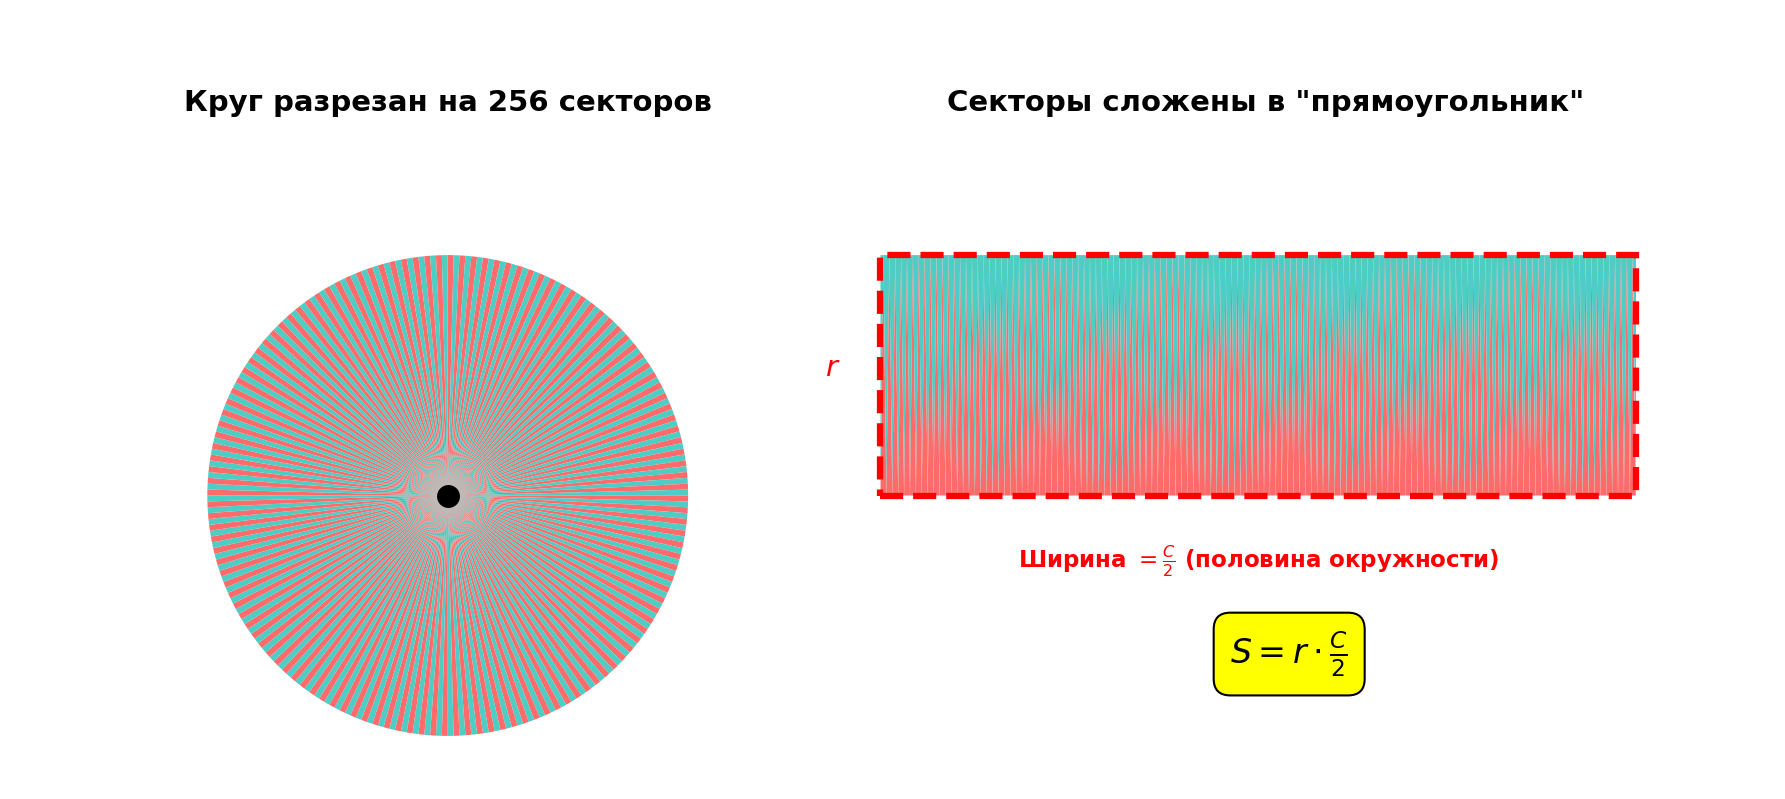

In [388]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import matplotlib.patches as mpatches

# Настройка для Retina дисплеев
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

# Параметры
radius = 1
n_sectors = 256  # 8 секторов как пицца
colors = ['#FF6B6B' if i % 2 == 0 else '#4ECDC4' for i in range(n_sectors)]

# Создаем один график
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_aspect('equal')
ax.axis('off')
ax.set_xlim(-1.8, 5.5)
ax.set_ylim(-1.2, 2)

# ========== ЛЕВАЯ ЧАСТЬ: Круг из 8 секторов ==========
circle_center = (0, 0)

# Заголовок над кругом
ax.text(0, 1.6, 'Круг разрезан на 256 секторов', ha='center', fontsize=14, weight='bold')

for i in range(n_sectors):
    # Начинаем с верха (90°) и идем по часовой стрелке (уменьшаем угол)
    theta1 = 90 - i * 360 / n_sectors
    theta2 = 90 - (i + 1) * 360 / n_sectors
    
    wedge = Wedge(circle_center, radius, theta2, theta1,  # Меняем порядок для часовой стрелки
                  facecolor=colors[i], 
                  edgecolor='black', 
                  linewidth=0)
    ax.add_patch(wedge)
    
    # Добавляем номер сектора по порядку (1, 2, 3...)
    sector_number = i + 1
    mid_theta = np.radians((theta1 + theta2) / 2)
    label_x = 0.6 * radius * np.cos(mid_theta)
    label_y = 0.6 * radius * np.sin(mid_theta)
#     ax.text(label_x, label_y, str(sector_number), ha='center', va='center', 
#             fontsize=16, weight='bold', color='white',
#             bbox=dict(boxstyle='circle,pad=0.3', facecolor='black', alpha=0.7))

# Центральная точка
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# ========== ПРАВАЯ ЧАСТЬ: Секторы составлены в прямоугольник ==========

# Заголовок над прямоугольником
ax.text(3.4, 1.6, 'Секторы сложены в "прямоугольник"', ha='center', fontsize=14, weight='bold')

# Угол одного сектора
sector_angle = 2 * np.pi / n_sectors
x_offset = 1.8  # Начало правой части (ближе к кругу)

# Располагаем секторы: четные вверху, нечетные внизу МЕЖДУ четными
half = n_sectors // 2
color_red = '#FF6B6B'
color_cyan = '#4ECDC4'
y_offset = 0
arc_length = sector_angle * radius

# Чередующиеся треугольники: красные вверх, синие вниз
x_pos = 1.8

# Половина синего треугольника — гипотенуза совпадает с левой стороной красного
xs = np.array([x_pos, x_pos + arc_length/2, x_pos])
ys = np.array([y_offset + radius, y_offset + radius, y_offset])
polygon = mpatches.Polygon(np.column_stack([xs, ys]), 
                          facecolor=color_cyan, 
                          edgecolor='black', 
                          linewidth=0)
ax.add_patch(polygon)

for i in range(n_sectors):
    if i % 2 == 0:
        # Красные (нечётные секторы 1, 3, 5, 7) — вершиной вверх
        xs = np.array([x_pos, x_pos + arc_length, x_pos + arc_length/2])
        ys = np.array([y_offset, y_offset, y_offset + radius])
        color = color_red
        label_y = y_offset + radius * 0.5
        label_x = x_pos + arc_length/2
    else:
        # Синие (чётные секторы 2, 4, 6, 8) — вершиной вниз
        if i == n_sectors - 1:
            # Последний синий — только левая половина
            xs = np.array([x_pos - arc_length/2, x_pos, x_pos])
            ys = np.array([y_offset + radius, y_offset + radius, y_offset])
        else:
            xs = np.array([x_pos - arc_length/2, x_pos + arc_length/2, x_pos])
            ys = np.array([y_offset + radius, y_offset + radius, y_offset])
        color = color_cyan
        label_y = y_offset + radius * 0.5
        label_x = x_pos
    
    polygon = mpatches.Polygon(np.column_stack([xs, ys]), 
                              facecolor=color, 
                              edgecolor='black', 
                              linewidth=0)
    ax.add_patch(polygon)
    
    # Номер сектора
#     sector_number = i + 1
#     ax.text(label_x, label_y, str(sector_number), ha='center', va='center', 
#             fontsize=16, weight='bold', color='white',
#             bbox=dict(boxstyle='circle,pad=0.3', facecolor='black', alpha=0.7))
    
    # Сдвигаем только для красных
    if i % 2 == 0:
        x_pos += arc_length

# Рисуем пунктирный прямоугольник вокруг (ширина = C/2, высота = r)
rect_x = 1.8
rect_y = 0
rect_width = half * arc_length  # Половина окружности C/2
rect_height = radius

rect_outline = mpatches.Rectangle((rect_x, rect_y), rect_width, rect_height,
                                 fill=False,
                                 edgecolor='red',
                                 linewidth=3,
                                 linestyle='--')
ax.add_patch(rect_outline)

# Подписи размеров
ax.text(rect_x + rect_width/2, -0.3, r'Ширина $= \frac{C}{2}$ (половина окружности)', 
        ha='center', fontsize=11, color='red', weight='bold')
ax.text(rect_x - 0.2, 0.5, r'$r$', 
        ha='center', fontsize=14, color='red', weight='bold')

# Формула внизу
ax.text(3.5, -0.7, r'$S = r \cdot \frac{C}{2}$', 
        ha='center', fontsize=16, weight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', 
                 edgecolor='black', linewidth=1))

plt.tight_layout()
plt.show()


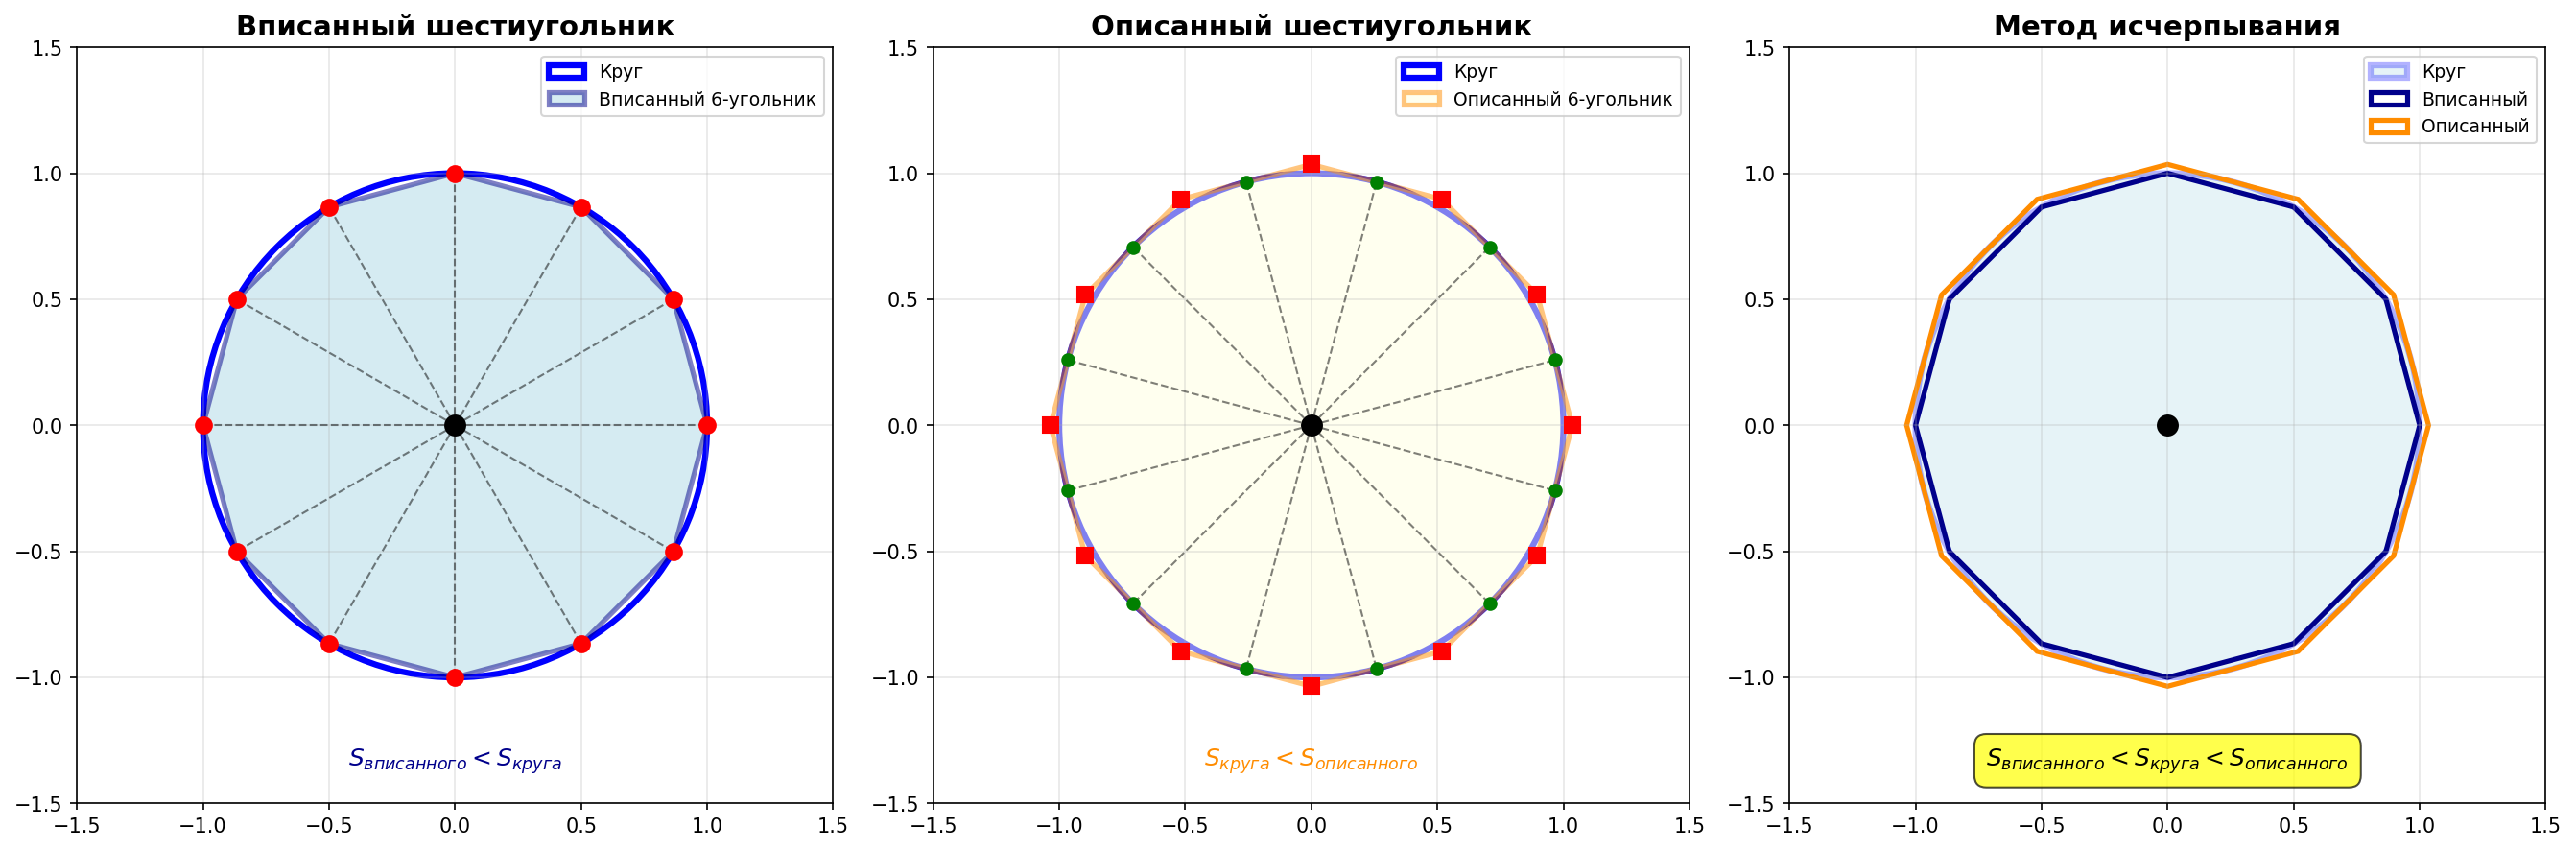

In [389]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Настройка для Retina дисплеев
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

# Создаем фигуру с тремя подграфиками
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

radius = 1
n_sides = 12  # Шестиугольник

# ========== График 1: Вписанный шестиугольник ==========
ax = axes[0]
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, alpha=0.3)
ax.set_title('Вписанный шестиугольник', fontsize=14, weight='bold')

# Рисуем круг
circle = plt.Circle((0, 0), radius, fill=False, edgecolor='blue', linewidth=3, label='Круг')
ax.add_patch(circle)

# Рисуем вписанный шестиугольник
angles_inscribed = np.linspace(90, 90 + 360, n_sides + 1) * np.pi / 180
x_inscribed = radius * np.cos(angles_inscribed)
y_inscribed = radius * np.sin(angles_inscribed)

polygon_inscribed = mpatches.Polygon(np.column_stack([x_inscribed[:-1], y_inscribed[:-1]]),
                                     fill=True, facecolor='lightblue', alpha=0.5,
                                     edgecolor='darkblue', linewidth=2.5,
                                     label='Вписанный 6-угольник')
ax.add_patch(polygon_inscribed)

# Рисуем радиусы к вершинам
for i in range(n_sides):
    ax.plot([0, x_inscribed[i]], [0, y_inscribed[i]], 'k--', linewidth=1, alpha=0.5)
    ax.plot(x_inscribed[i], y_inscribed[i], 'ro', markersize=8)

# Центральная точка
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# Подпись
ax.text(0, -1.35, r'$S_{вписанного} < S_{круга}$', 
        ha='center', fontsize=12, weight='bold', color='darkblue')

ax.legend(loc='upper right', fontsize=9)

# ========== График 2: Описанный шестиугольник ==========
ax = axes[1]
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, alpha=0.3)
ax.set_title('Описанный шестиугольник', fontsize=14, weight='bold')

# Рисуем круг
circle = plt.Circle((0, 0), radius, fill=False, edgecolor='blue', linewidth=3, label='Круг')
ax.add_patch(circle)

# Рисуем описанный шестиугольник
# Расстояние от центра до стороны описанного многоугольника = radius
# Расстояние от центра до вершины = radius / cos(π/n_sides)
radius_circumscribed = radius / np.cos(np.pi / n_sides)

angles_circumscribed = np.linspace(90, 90 + 360, n_sides + 1) * np.pi / 180
x_circumscribed = radius_circumscribed * np.cos(angles_circumscribed)
y_circumscribed = radius_circumscribed * np.sin(angles_circumscribed)

polygon_circumscribed = mpatches.Polygon(np.column_stack([x_circumscribed[:-1], y_circumscribed[:-1]]),
                                         fill=True, facecolor='lightyellow', alpha=0.5,
                                         edgecolor='darkorange', linewidth=2.5,
                                         label='Описанный 6-угольник')
ax.add_patch(polygon_circumscribed)

# Рисуем радиусы к серединам сторон
for i in range(n_sides):
    mid_angle = (angles_circumscribed[i] + angles_circumscribed[i+1]) / 2
    x_mid = radius * np.cos(mid_angle)
    y_mid = radius * np.sin(mid_angle)
    ax.plot([0, x_mid], [0, y_mid], 'k--', linewidth=1, alpha=0.5)
    ax.plot(x_mid, y_mid, 'go', markersize=6)

# Вершины описанного многоугольника
for i in range(n_sides):
    ax.plot(x_circumscribed[i], y_circumscribed[i], 'rs', markersize=8)

# Центральная точка
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# Подпись
ax.text(0, -1.35, r'$S_{круга} < S_{описанного}$', 
        ha='center', fontsize=12, weight='bold', color='darkorange')

ax.legend(loc='upper right', fontsize=9)

# ========== График 3: Оба многоугольника вместе ==========
ax = axes[2]
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, alpha=0.3)
ax.set_title('Метод исчерпывания', fontsize=14, weight='bold')

# Рисуем круг
circle = plt.Circle((0, 0), radius, fill=True, facecolor='lightblue', alpha=0.3,
                    edgecolor='blue', linewidth=3, label='Круг')
ax.add_patch(circle)

# Вписанный многоугольник
polygon_inscribed = mpatches.Polygon(np.column_stack([x_inscribed[:-1], y_inscribed[:-1]]),
                                     fill=False,
                                     edgecolor='darkblue', linewidth=2.5,
                                     label='Вписанный')
ax.add_patch(polygon_inscribed)

# Описанный многоугольник
polygon_circumscribed = mpatches.Polygon(np.column_stack([x_circumscribed[:-1], y_circumscribed[:-1]]),
                                         fill=False,
                                         edgecolor='darkorange', linewidth=2.5,
                                         label='Описанный')
ax.add_patch(polygon_circumscribed)

# Центральная точка
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# Подпись с формулой
ax.text(0, -1.35, r'$S_{вписанного} < S_{круга} < S_{описанного}$', 
        ha='center', fontsize=12, weight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

ax.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()


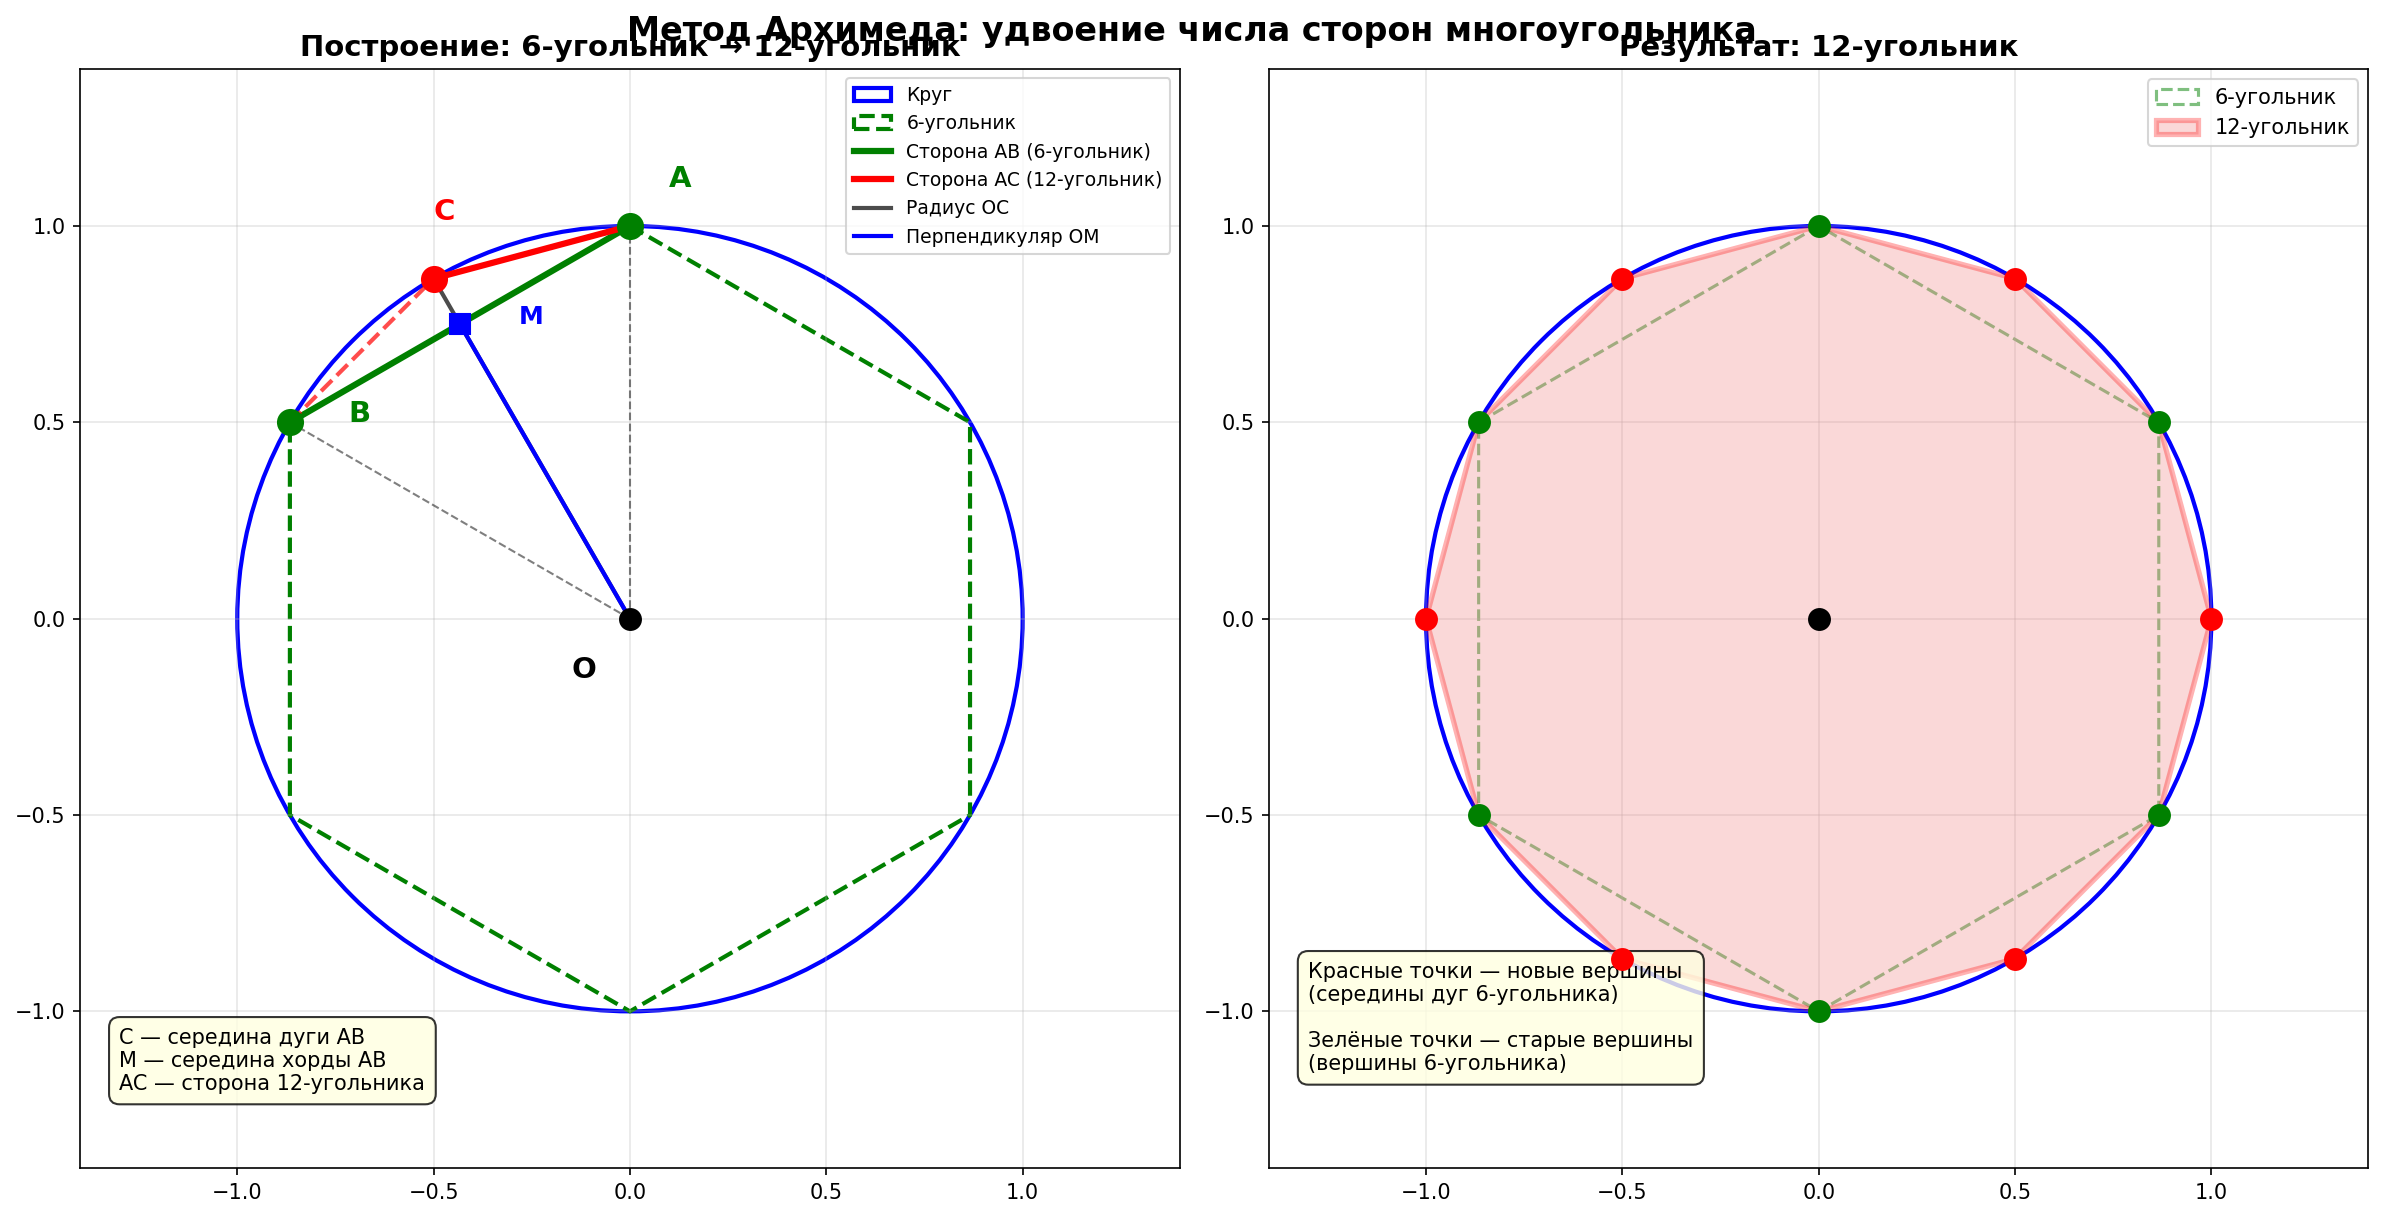

In [390]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Настройка для Retina дисплеев
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Метод Архимеда: удвоение числа сторон многоугольника', 
             fontsize=16, weight='bold')

radius = 1

# ========== График 1: От 6-угольника к 12-угольнику ==========
ax = axes[0]
ax.set_aspect('equal')
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1.4, 1.4)
ax.grid(True, alpha=0.3)
ax.set_title('Построение: 6-угольник → 12-угольник', fontsize=14, weight='bold')

# Рисуем круг
circle = plt.Circle((0, 0), radius, fill=False, edgecolor='blue', linewidth=2, label='Круг')
ax.add_patch(circle)

# Вписанный 6-угольник
n_sides_6 = 6
angles_6 = np.linspace(90, 90 + 360, n_sides_6 + 1) * np.pi / 180
x_6 = radius * np.cos(angles_6)
y_6 = radius * np.sin(angles_6)

polygon_6 = mpatches.Polygon(np.column_stack([x_6[:-1], y_6[:-1]]),
                             fill=False,
                             edgecolor='green', linewidth=2,
                             linestyle='--',
                             label='6-угольник', zorder=1)
ax.add_patch(polygon_6)

# Берем одну сторону AB для демонстрации
A_idx = 0
B_idx = 1
A = np.array([x_6[A_idx], y_6[A_idx]])
B = np.array([x_6[B_idx], y_6[B_idx]])

# Середина дуги между A и B - новая вершина C для 12-угольника
mid_angle = (angles_6[A_idx] + angles_6[B_idx]) / 2
C = np.array([radius * np.cos(mid_angle), radius * np.sin(mid_angle)])

# Центр круга
O = np.array([0, 0])

# Середина хорды AB
M = (A + B) / 2

# Рисуем ключевые элементы
ax.plot([A[0], B[0]], [A[1], B[1]], 'g-', linewidth=3, label='Сторона AB (6-угольник)')
ax.plot([A[0], C[0]], [A[1], C[1]], 'r-', linewidth=3, label='Сторона AC (12-угольник)')
ax.plot([B[0], C[0]], [B[1], C[1]], 'r--', linewidth=2, alpha=0.7)

# Радиусы
ax.plot([O[0], A[0]], [O[1], A[1]], 'k--', linewidth=1, alpha=0.5)
ax.plot([O[0], B[0]], [O[1], B[1]], 'k--', linewidth=1, alpha=0.5)
ax.plot([O[0], C[0]], [O[1], C[1]], 'k-', linewidth=2, alpha=0.7, label='Радиус OC')

# Перпендикуляр OM
ax.plot([O[0], M[0]], [O[1], M[1]], 'b-', linewidth=2, label='Перпендикуляр OM')

# Точки
ax.plot(*O, 'ko', markersize=10, zorder=5)
ax.plot(*A, 'go', markersize=12, zorder=5)
ax.plot(*B, 'go', markersize=12, zorder=5)
ax.plot(*C, 'ro', markersize=12, zorder=5)
ax.plot(*M, 'bs', markersize=10, zorder=5)

# Подписи точек
ax.text(O[0]-0.15, O[1]-0.15, 'O', fontsize=14, weight='bold')
ax.text(A[0]+0.1, A[1]+0.1, 'A', fontsize=14, weight='bold', color='green')
ax.text(B[0]+0.15, B[1], 'B', fontsize=14, weight='bold', color='green')
ax.text(C[0], C[1]+0.15, 'C', fontsize=14, weight='bold', color='red')
ax.text(M[0]+0.15, M[1], 'M', fontsize=12, weight='bold', color='blue')

# Пояснение
explanation = (
    'C — середина дуги AB\n'
    'M — середина хорды AB\n'
    'AC — сторона 12-угольника'
)
ax.text(-1.3, -1.2, explanation, fontsize=10, 
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8))

ax.legend(loc='upper right', fontsize=9)

# ========== График 2: Полный 12-угольник ==========
ax = axes[1]
ax.set_aspect('equal')
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1.4, 1.4)
ax.grid(True, alpha=0.3)
ax.set_title('Результат: 12-угольник', fontsize=14, weight='bold')

# Рисуем круг
circle = plt.Circle((0, 0), radius, fill=False, edgecolor='blue', linewidth=2)
ax.add_patch(circle)

# Вписанный 6-угольник (пунктир)
polygon_6 = mpatches.Polygon(np.column_stack([x_6[:-1], y_6[:-1]]),
                             fill=False,
                             edgecolor='green', linewidth=1.5,
                             linestyle='--',
                             label='6-угольник', alpha=0.5, zorder=1)
ax.add_patch(polygon_6)

# Вписанный 12-угольник
n_sides_12 = 12
angles_12 = np.linspace(90, 90 + 360, n_sides_12 + 1) * np.pi / 180
x_12 = radius * np.cos(angles_12)
y_12 = radius * np.sin(angles_12)

polygon_12 = mpatches.Polygon(np.column_stack([x_12[:-1], y_12[:-1]]),
                              fill=True, facecolor='lightcoral', alpha=0.3,
                              edgecolor='red', linewidth=2.5,
                              label='12-угольник', zorder=2)
ax.add_patch(polygon_12)

# Вершины 6-угольника
for i in range(n_sides_6):
    ax.plot(x_6[i], y_6[i], 'go', markersize=10, zorder=4)

# Новые вершины (середины дуг)
for i in range(n_sides_12):
    if i % 2 == 1:  # Новые вершины
        ax.plot(x_12[i], y_12[i], 'ro', markersize=10, zorder=5)

# Центр
ax.plot(0, 0, 'ko', markersize=10, zorder=5)

# Пояснение
explanation = (
    'Красные точки — новые вершины\n'
    '(середины дуг 6-угольника)\n\n'
    'Зелёные точки — старые вершины\n'
    '(вершины 6-угольника)'
)
ax.text(-1.3, -1.15, explanation, fontsize=10, 
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8))

ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()
